In [1]:
# Importación de librerías estándar
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Configuración para que pandas muestre todas las columnas
pd.set_option('display.max_columns', None)

print("Librerías importadas exitosamente.")

Librerías importadas exitosamente.


In [2]:
# --- Rutas de Archivos de Entrada (Crudos) ---
RUTA_DATOS_CRUDOS = os.path.join('..', '1_datos', '01_crudos')
RUTA_ELECTORAL = os.path.join(RUTA_DATOS_CRUDOS, 'analisis_agregado_por_seccion.csv')
RUTA_CENSO = os.path.join(RUTA_DATOS_CRUDOS, 'censo_manzanillo_completo_2020.csv')

# Asumiendo que la carpeta con el shapefile se llama 'shapes_secciones'
RUTA_SHAPEFILE = os.path.join(RUTA_DATOS_CRUDOS, 'SECCION.shp')


# --- Rutas de Archivos de Salida (Procesados) ---
RUTA_DATOS_PROCESADOS = os.path.join('..', '1_datos', '02_procesados')
RUTA_SALIDA_GPKG = os.path.join(RUTA_DATOS_PROCESADOS, 'gdf_maestro_manzanillo.gpkg')

print(f"Ruta electoral: {RUTA_ELECTORAL}")
print(f"Ruta censo: {RUTA_CENSO}")
print(f"Ruta shapefile: {RUTA_SHAPEFILE}")
print(f"Ruta de salida: {RUTA_SALIDA_GPKG}")

Ruta electoral: ../1_datos/01_crudos/analisis_agregado_por_seccion.csv
Ruta censo: ../1_datos/01_crudos/censo_manzanillo_completo_2020.csv
Ruta shapefile: ../1_datos/01_crudos/SECCION.shp
Ruta de salida: ../1_datos/02_procesados/gdf_maestro_manzanillo.gpkg


In [3]:
try:
    df_electoral = pd.read_csv(RUTA_ELECTORAL)
    df_censo = pd.read_csv(RUTA_CENSO)
    gdf_secciones_estado = gpd.read_file(RUTA_SHAPEFILE)
    print("Todos los archivos se cargaron correctamente.")
except FileNotFoundError as e:
    print(f"Error: No se encontró un archivo. Revisa las rutas y nombres en la celda anterior.")
    print(e)

Todos los archivos se cargaron correctamente.


In [4]:
print("--- Info Electoral ---")
df_electoral.info()
print("\n--- Info Censo ---")
df_censo.info()
print("\n--- Info Shapefile ---")
gdf_secciones_estado.info()

print("\n--- Primeras filas Electoral ---")
display(df_electoral.head(3))
print("\n--- Primeras filas Censo ---")
display(df_censo.head(3))
print("\n--- Primeras filas Shapefile ---")
display(gdf_secciones_estado.head(3))

--- Info Electoral ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seccion                      171 non-null    int64  
 1   lista_nominal_promedio       171 non-null    float64
 2   votos_totales_acumulados     171 non-null    int64  
 3   votos_morena_acumulados      171 non-null    int64  
 4   votos_oposicion_acumulados   171 non-null    int64  
 5   partido_dominante            171 non-null    object 
 6   pct_voto_morena              171 non-null    float64
 7   tasa_participacion_promedio  171 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 10.8+ KB

--- Info Censo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 226 entries, ID to VPH_SINTIC
dtypes: float64(7), int64(219)
memory usage: 123.7 KB

--- Info Shapefile ---
<class 'geopandas.geoda

,seccion,lista_nominal_promedio,votos_totales_acumulados,votos_morena_acumulados,votos_oposicion_acumulados,partido_dominante,pct_voto_morena,tasa_participacion_promedio
0,0,8.000000,14,3,11,pan,20.000000,34.146341
1,170,579.333333,1010,3,986,pan,0.303030,58.079356
2,171,505.666667,934,2,910,pan,0.219058,61.528327



--- Primeras filas Censo ---


,ID,ENTIDAD,DISTRITO,MUNICIPIO,seccion,TIPO,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_0A17,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,POB_EDADNE,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LEN,PCDISC_AUD,PCDISC_M_A,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_C,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRI,PAFIL_OTRA,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN,VPH_SINTIC
0,134,6,2,8,200,3,621,312,309,21,7,14,176,600,305,295,575,293,282,510,265,245,472,245,227,445,233,212,37,16,21,53,24,29,71,32,39,38,20,18,27,12,15,69,34,35,158,98,56,42,99.04,149,414,58,0,2.08,378,178,200,242,133,109,499,251,248,72,40,32,6,3,3,0,0,0,6,3,3,6,0,6,5,8,4,4,43,31,7,8,5,7,5,88,28,47,6,23,2,10,18,486,16,5,11,2,1,1,2,1,1,21,10,11,23,13,10,0,0,0,6,2,4,11,6,5,29,17,12,61,34,27,17,5,12,121,63,58,223,113,110,10.08,9.99,10.19,304,131,173,203,134,69,295,129,166,9,2,7,72,549,325,31,0,105,87,0,5,1,178,258,74,187,47,140,618,132,486,257,188,232,163,187,187,53,16,618,3.30,0.90,182,5,72,115,16,46,125,187,0,183,183,4,133,45,186,0,186,1,182,0,186,130,0,173,134,60,50,13,28,173,179,85,83,177,112,88,48,16,2,5,65,0
1,38,6,2,8,201,2,7,5,2,0,0,0,2,7,5,2,7,5,2,7,5,2,6,4,2,5,4,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,4,3,1,40.00,1,3,3,0,3.50,3,2,1,4,3,1,7,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,0,3,2,1,11.17,10.75,12.00,2,1,1,5,4,1,2,1,1,0,0,0,0,7,6,1,0,0,0,0,0,0,2,3,2,4,3,1,7,5,2,4,4,4,4,4,4,0,0,7,1.75,0.88,4,0,0,4,0,4,0,4,0,4,4,0,4,0,4,0,4,0,4,0,4,2,0,4,4,4,2,0,0,0,4,3,4,3,3,4,1,0,0,0,1,0
2,27,6,2,8,202,2,2322,1179,1143,87,35,52,594,2235,1144,1091,2168,1112,1056,1961,1013,948,1842,951,891,1728,892,836,96,48,48,178,83,95,236,118,118,119,62,57,114,59,55,252,122,130,624,366,197,169,96.95,480,1578,264,0,2.10,1607,811,796,706,363,343,2086,1072,1014,79,40,39,11,5,6,0,0,0,10,5,5,11,0,10,25,13,4,9,142,63,85,11,26,19,17,367,119,278,16,74,6,63,52,1775,51,27,24,18,5,13,20,5,15,95,51,44,73,38,35,10,3,7,63,35,28,123,63,60,101,59,42,289,150,139,56,33,23,571,292,279,656,334,322,9.18,9.14,9.22,1232,513,719,728,500,228,1216,510,706,16,3,13,297,2025,1374,80,0,102,422,2,19,40,642,1003,316,733,2


--- Primeras filas Shapefile ---


,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_,geometry
0,1.0,6,1,6,1,2,2,129.0,None,"POLYGON ((635126.305 2130241.428, 635135.598 2..."
1,2.0,6,1,2,1,3,2,93.0,None,"POLYGON ((633459.306 2130164.567, 633567.54 21..."
2,3.0,6,1,2,1,4,2,94.0,None,"POLYGON ((633997.994 2129434.412, 634001.174 2..."


In [5]:
# Revisa la salida de la celda anterior y pon los nombres exactos de tus columnas de sección.
COL_ELECTORAL = 'seccion'
COL_CENSO = 'seccion' # Probablemente se llame 'seccion' o algo similar
COL_SHAPEFILE = 'SECCION'

# Renombramos todas a un nombre estándar: 'seccion'
df_electoral.rename(columns={COL_ELECTORAL: 'seccion'}, inplace=True)
df_censo.rename(columns={COL_CENSO: 'seccion'}, inplace=True)
gdf_secciones_estado.rename(columns={COL_SHAPEFILE: 'seccion'}, inplace=True)

# Verificamos que el tipo de dato sea el mismo (generalmente numérico)
df_electoral['seccion'] = df_electoral['seccion'].astype(int)
df_censo['seccion'] = df_censo['seccion'].astype(int)
gdf_secciones_estado['seccion'] = gdf_secciones_estado['seccion'].astype(int)

print("Columnas de sección renombradas a 'seccion' y convertidas a tipo entero.")
print(f"Tipo de dato en df_electoral['seccion']: {df_electoral['seccion'].dtype}")
print(f"Tipo de dato en df_censo['seccion']: {df_censo['seccion'].dtype}")
print(f"Tipo de dato en gdf_secciones_estado['seccion']: {gdf_secciones_estado['seccion'].dtype}")

Columnas de sección renombradas a 'seccion' y convertidas a tipo entero.
Tipo de dato en df_electoral['seccion']: int64
Tipo de dato en df_censo['seccion']: int64
Tipo de dato en gdf_secciones_estado['seccion']: int64


In [6]:
# --- Celda 6: Versión Final con Clave Manual CORRECTA ---

lista_secciones_manzanillo = df_censo['seccion'].unique()
print(f"Número de secciones de Manzanillo a buscar: {len(lista_secciones_manzanillo)}")

# La clave oficial del INEGI para Colima es 6.
CLAVE_ENTIDAD_COLIMA = 6
print(f"\nUsando la clave de Entidad manual: {CLAVE_ENTIDAD_COLIMA} (Oficial INEGI para Colima)")

gdf_colima = gdf_secciones_estado[gdf_secciones_estado['ENTIDAD'] == CLAVE_ENTIDAD_COLIMA].copy()
print(f"Secciones encontradas en el estado de Colima (Entidad {CLAVE_ENTIDAD_COLIMA}): {len(gdf_colima)}")

gdf_manzanillo = gdf_colima[gdf_colima['seccion'].isin(lista_secciones_manzanillo)].copy()
print(f"Shapefile filtrado. Secciones finales encontradas para Manzanillo: {len(gdf_manzanillo)}")

if len(gdf_manzanillo) == len(lista_secciones_manzanillo):
    print("\n¡ÉXITO! El número de geometrías coincide con el número de secciones de tu censo.")
else:
    print(f"\n¡ATENCIÓN! El número de geometrías no coincide. Se encontraron {len(gdf_manzanillo)} de 70.")

Número de secciones de Manzanillo a buscar: 70

Usando la clave de Entidad manual: 6 (Oficial INEGI para Colima)
Secciones encontradas en el estado de Colima (Entidad 6): 406
Shapefile filtrado. Secciones finales encontradas para Manzanillo: 65

¡ATENCIÓN! El número de geometrías no coincide. Se encontraron 65 de 70.


In [10]:
# --- Celda 6.1: Diagnóstico de Inconsistencias de Secciones ---

# 1. Convertir las columnas de sección a conjuntos (sets) para una comparación fácil y rápida.
#    Un conjunto es una colección de elementos únicos.
secciones_del_censo = set(df_censo['seccion'].unique())
secciones_del_shapefile_colima = set(gdf_colima['seccion'].unique())

# 2. Encontrar las diferencias usando operaciones de conjuntos.
#    La resta de conjuntos (A - B) nos da los elementos que están en A pero NO en B.

# Secciones que están en tu archivo del CENSO pero que NO se encontraron en el SHAPEFILE de Colima.
secciones_faltantes_en_shapefile = secciones_del_censo - secciones_del_shapefile_colima

# (Opcional, pero útil) Secciones que están en el SHAPEFILE de Colima pero NO en tu CENSO de Manzanillo.
secciones_sobrantes_en_shapefile = secciones_del_shapefile_colima - secciones_del_censo


# 3. Imprimir los resultados de forma clara para que los puedas analizar.
print("--- Diagnóstico de Inconsistencia de Secciones ---")

if secciones_faltantes_en_shapefile:
    print(f"\nSe encontraron {len(secciones_faltantes_en_shapefile)} secciones en tu archivo del CENSO que NO existen en el SHAPEFILE de Colima:")
    # Usamos sorted() para ver la lista en orden
    print(sorted(list(secciones_faltantes_en_shapefile)))
    print("Estas son las 5 secciones que causan la discrepancia.")
else:
    print("\n¡Buenas noticias! Todas las secciones del censo existen en el shapefile.")



--- Diagnóstico de Inconsistencia de Secciones ---

Se encontraron 5 secciones en tu archivo del CENSO que NO existen en el SHAPEFILE de Colima:
[np.int64(236), np.int64(238), np.int64(244), np.int64(248), np.int64(250)]
Estas son las 5 secciones que causan la discrepancia.


In [51]:
# --- Celda 7 Modificada ---

# 1. Unimos las dos tablas de datos (electoral y censo)
df_maestro = pd.merge(df_electoral, df_censo, on='seccion', how='inner')
print(f"Dimensiones tras unir electoral y censo: {df_maestro.shape}")

# 2. ANTES de la unión final, identificamos y eliminamos las columnas que se duplicarían.
# Estas son columnas que están tanto en el shapefile como en tus otros datos (excepto 'seccion').
# REVISA Y AJUSTA ESTA LISTA SI ES NECESARIO BASÁNDOTE EN TUS ARCHIVOS
columnas_a_eliminar = ['ID', 'ENTIDAD', 'MUNICIPIO', 'TIPO', 'CONTROL']

# Para evitar errores, creamos una lista final solo con las columnas que realmente existen en df_maestro
columnas_existentes_para_eliminar = [col for col in columnas_a_eliminar if col in df_maestro.columns]

if columnas_existentes_para_eliminar:
    print(f"\nEliminando las siguientes columnas redundantes de la tabla de datos: {columnas_existentes_para_eliminar}")
    df_maestro_limpio = df_maestro.drop(columns=columnas_existentes_para_eliminar)
else:
    print("\nNo se encontraron columnas redundantes para eliminar.")
    df_maestro_limpio = df_maestro.copy()


# 3. Unimos la tabla de datos maestra (ya sin duplicados) con las geometrías
gdf_maestro = pd.merge(gdf_manzanillo, df_maestro_limpio, on='seccion', how='inner')
print(f"Dimensiones tras unir con geometrías: {gdf_maestro.shape}")

# Verificamos que ya no hay columnas con sufijos _x o _y
print("\nColumnas del GeoDataFrame final:")
print(gdf_maestro.columns.to_list())

print("\nVista previa del resultado final y limpio:")
display(gdf_maestro.head())

Dimensiones tras unir electoral y censo: (70, 233)

Eliminando las siguientes columnas redundantes de la tabla de datos: ['ID', 'ENTIDAD', 'MUNICIPIO', 'TIPO']
Dimensiones tras unir con geometrías: (65, 238)

Columnas del GeoDataFrame final:
['ID', 'ENTIDAD', 'DISTRITO_F', 'DISTRITO_L', 'MUNICIPIO', 'seccion', 'TIPO', 'CONTROL', 'GEOMETRY1_', 'geometry', 'lista_nominal_promedio', 'votos_totales_acumulados', 'votos_morena_acumulados', 'votos_oposicion_acumulados', 'partido_dominante', 'pct_voto_morena', 'tasa_participacion_promedio', 'DISTRITO', 'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_0A17', 'P_3YMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 

,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,seccion,TIPO,CONTROL,GEOMETRY1_,geometry,lista_nominal_promedio,votos_totales_acumulados,votos_morena_acumulados,votos_oposicion_acumulados,partido_dominante,pct_voto_morena,tasa_participacion_promedio,DISTRITO,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_0A17,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,POB_EDADNE,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LEN,PCDISC_AUD,PCDISC_M_A,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_C,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRI,PAFIL_OTRA,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN,VPH_SINTIC
0,243.0,6,2,12,8,254,2,209.0,None,"POLYGON ((573667.542 2109247.202, 573680.491 2...",478.458333,8258,1728,6297,pan,21.530027,71.908743,2,660,339,321,19,5,14,122,582,306,276,571,299,272,529,276,253,495,261,234,479,254,225,16,11,5,37,19,18,60,32,28,34,15,19,16,7,9,54,27,27,143,132,72,60,94.69,106,406,89,59,1.57,318,162,156,270,140,130,502,257,245,69,42,27,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,7,15,9,5,1,2,3,2,44,11,30,1,7,1,2,5,539,6,4,2,2,2,0,4,2,2,11,6,5,26,13,13,1,0,1,3,2,1,3,2,1,11,5,6,23,15,8,9,5,4,63,31,32,376,198,178,13.27,13.07,13.50,304,127,177,224,148,76,302,127,175,2,0,2,100,501,321,37,2,91,31,0,23,1,194,253,82,244,80,164,659,167,492,333,245,280,192,244,244,56,32,659,2.70,0.80,219,3,76,146,14,55,153,221,1,222,222,0,186,3,222,0,222,0,221,0,222,75,1,214,185,117,140,22,78,154,209,148,146,213,183,141,78,30,12,5,25,2
1,244.0,6,2,12,8,255,2,210.0,None,"POLYGON ((573234.809 2109055.118, 573285.2 210...",312.541667,5749,1645,3938,morena,29.459169,76.632898,2,375,200,175,4,1,3,70,369,198,171,359,195,164,334,183,151,320,175,145,303,167,136,14,5,9,21,10,11,30,15,15,14,8,6,17,8,9,44,21,23,87,88,46,42,87.50,53,255,65,2,1.79,223,123,100,144,74,70,353,192,161,5,3,2,1,1,0,0,0,0,1,1,0,1,0,1,2,0,0,0,11,6,3,3,4,1,0,35,14,20,0,4,0,5,4,325,6,2,4,4,3,1,0,0,0,13,8,5,15,7,8,1,1,0,4,3,1,4,3,1,13,7,6,39,24,15,7,2,5,47,25,22,198,108,90,11.62,11.48,11.80,184,81,103,147,99,48,178,80,98,6,1,5,73,300,199,21,1,61,21,0,3,0,143,149,42,132,49,83,375,120,255,207,132,183,108,132,132,53,22,375,2.84,0.79,131,0,33,98,3,22,106,131,0,131,131,0,101,5,131,0,131,0,131,0,131,57,2,124,119,42,69,13,34,79

In [52]:
print("--- Información del GeoDataFrame Maestro Final ---")
gdf_maestro.info()

print("\n--- Primeras 5 Filas del GeoDataFrame Maestro ---")
display(gdf_maestro.head())

print("\n--- Últimas 5 Filas del GeoDataFrame Maestro ---")
display(gdf_maestro.tail())

--- Información del GeoDataFrame Maestro Final ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Columns: 238 entries, ID to VPH_SINTIC
dtypes: float64(12), geometry(1), int64(223), object(2)
memory usage: 121.0+ KB

--- Primeras 5 Filas del GeoDataFrame Maestro ---


,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,seccion,TIPO,CONTROL,GEOMETRY1_,geometry,lista_nominal_promedio,votos_totales_acumulados,votos_morena_acumulados,votos_oposicion_acumulados,partido_dominante,pct_voto_morena,tasa_participacion_promedio,DISTRITO,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_0A17,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,POB_EDADNE,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LEN,PCDISC_AUD,PCDISC_M_A,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_C,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRI,PAFIL_OTRA,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN,VPH_SINTIC
0,243.0,6,2,12,8,254,2,209.0,None,"POLYGON ((573667.542 2109247.202, 573680.491 2...",478.458333,8258,1728,6297,pan,21.530027,71.908743,2,660,339,321,19,5,14,122,582,306,276,571,299,272,529,276,253,495,261,234,479,254,225,16,11,5,37,19,18,60,32,28,34,15,19,16,7,9,54,27,27,143,132,72,60,94.69,106,406,89,59,1.57,318,162,156,270,140,130,502,257,245,69,42,27,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,7,15,9,5,1,2,3,2,44,11,30,1,7,1,2,5,539,6,4,2,2,2,0,4,2,2,11,6,5,26,13,13,1,0,1,3,2,1,3,2,1,11,5,6,23,15,8,9,5,4,63,31,32,376,198,178,13.27,13.07,13.50,304,127,177,224,148,76,302,127,175,2,0,2,100,501,321,37,2,91,31,0,23,1,194,253,82,244,80,164,659,167,492,333,245,280,192,244,244,56,32,659,2.70,0.80,219,3,76,146,14,55,153,221,1,222,222,0,186,3,222,0,222,0,221,0,222,75,1,214,185,117,140,22,78,154,209,148,146,213,183,141,78,30,12,5,25,2
1,244.0,6,2,12,8,255,2,210.0,None,"POLYGON ((573234.809 2109055.118, 573285.2 210...",312.541667,5749,1645,3938,morena,29.459169,76.632898,2,375,200,175,4,1,3,70,369,198,171,359,195,164,334,183,151,320,175,145,303,167,136,14,5,9,21,10,11,30,15,15,14,8,6,17,8,9,44,21,23,87,88,46,42,87.50,53,255,65,2,1.79,223,123,100,144,74,70,353,192,161,5,3,2,1,1,0,0,0,0,1,1,0,1,0,1,2,0,0,0,11,6,3,3,4,1,0,35,14,20,0,4,0,5,4,325,6,2,4,4,3,1,0,0,0,13,8,5,15,7,8,1,1,0,4,3,1,4,3,1,13,7,6,39,24,15,7,2,5,47,25,22,198,108,90,11.62,11.48,11.80,184,81,103,147,99,48,178,80,98,6,1,5,73,300,199,21,1,61,21,0,3,0,143,149,42,132,49,83,375,120,255,207,132,183,108,132,132,53,22,375,2.84,0.79,131,0,33,98,3,22,106,131,0,131,131,0,101,5,131,0,131,0,131,0,131,57,2,124,119,42,69,13,34,79


--- Últimas 5 Filas del GeoDataFrame Maestro ---


,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,seccion,TIPO,CONTROL,GEOMETRY1_,geometry,lista_nominal_promedio,votos_totales_acumulados,votos_morena_acumulados,votos_oposicion_acumulados,partido_dominante,pct_voto_morena,tasa_participacion_promedio,DISTRITO,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_0A17,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,POB_EDADNE,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LEN,PCDISC_AUD,PCDISC_M_A,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_C,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRI,PAFIL_OTRA,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN,VPH_SINTIC
60,258.0,6,2,13,8,269,2,236.0,None,"POLYGON ((572161.715 2104197.49, 572168.109 21...",492.763889,26547,9029,16458,morena,35.424513,74.822435,2,2053,1007,1046,72,28,44,599,1981,979,1002,1930,954,976,1676,833,843,1552,763,789,1454,722,732,82,37,45,223,109,114,277,146,131,124,70,54,98,41,57,227,108,119,543,258,121,137,103.87,501,1390,162,0,2.12,1466,706,760,583,299,284,1855,917,938,71,37,34,3,1,2,0,0,0,3,1,2,3,0,3,10,8,3,5,122,82,41,15,22,19,18,183,75,87,10,51,9,54,17,1740,23,12,11,7,3,4,13,7,6,88,39,49,79,45,34,7,5,2,41,24,17,53,27,26,126,68,58,227,120,107,57,23,34,535,259,276,498,240,258,8.93,8.84,9.01,1092,422,670,584,411,173,1075,420,655,17,2,15,267,1786,1337,67,3,84,307,3,6,1,503,955,218,609,211,398,2053,750,1303,789,609,765,585,609,609,140,40,2053,3.37,1.07,590,19,228,381,41,161,407,606,3,603,602,6,408,35,600,0,596,13,594,2,594,292,4,572,473,172,242,138,171,450,564,139,165,570,261,213,39,31,22,26,324,7
61,254.0,6,2,9,8,265,4,228.0,None,"POLYGON ((590865.588 2102235.86, 590858.491 21...",440.727273,7470,2398,4862,morena,33.025754,77.034134,2,693,349,344,29,15,14,230,664,334,330,634,315,319,535,265,270,500,242,258,463,223,240,46,24,22,83,45,38,84,49,35,35,23,12,37,19,18,71,32,39,169,86,39,47,98.57,193,448,52,0,2.60,524,272,252,160,72,88,603,303,300,26,12,14,10,5,5,0,0,0,10,5,5,10,0,10,29,1,1,0,32,19,9,7,5,8,8,35,11,12,5,7,4,9,10,621,13,5,8,1,0,1,1,0,1,36,18,18,21,7,14,1,0,1,29,19,10,43,23,20,59,29,30,91,46,45,24,11,13,153,85,68,111,38,73,7.73,7.44,8.00,335,111,224,200,154,46,335,111,224,0,0,0,137,556,291,2,0,43,218,0,1,8,141,322,72,226,44,182,693,129,564,27

In [55]:
# --- Celda 9: Visualización Interactiva ---

print("Generando mapa interactivo de Manzanillo...")

# La función .explore() hace todo el trabajo pesado.
# Es importante que el GeoDataFrame esté en un CRS geográfico como EPSG:4326
# Si no lo está, lo convertimos primero. Asumamos que ya está bien.

mapa_interactivo = gdf_maestro.explore(
    column='tasa_participacion_promedio', # La columna numérica que definirá el color
    cmap='plasma',                       # Esquema de color (otros: 'viridis', 'Reds', 'Blues')
    tooltip=['seccion', 'partido_dominante', 'tasa_participacion_promedio'], # Info que aparece al pasar el mouse
    popup=True,                          # Si haces clic, aparece una ventana con toda la info de la fila
    legend=True,                         # Muestra la leyenda de colores
    scheme='quantiles',                  # Estrategia para agrupar los datos en colores (ej. quintiles)
    legend_kwds={'caption': 'Tasa de Participación Promedio (%)'}, # Título de la leyenda
    style_kwds={'stroke': True, 'color': 'black', 'weight': 0.6} # Estilo de las líneas de borde
)

# Para guardar el mapa como un archivo HTML independiente que puedes abrir en cualquier navegador:
# RUTA_MAPA = os.path.join('..', '4_outputs', 'figuras', 'mapa_participacion_interactivo.html')
# mapa_interactivo.save(RUTA_MAPA)
# print(f"Mapa interactivo guardado en: {RUTA_MAPA}")


# Para mostrar el mapa directamente en el notebook:
display(mapa_interactivo)

Generando mapa interactivo de Manzanillo...


Generando mapa estático mejorado con mapa base...


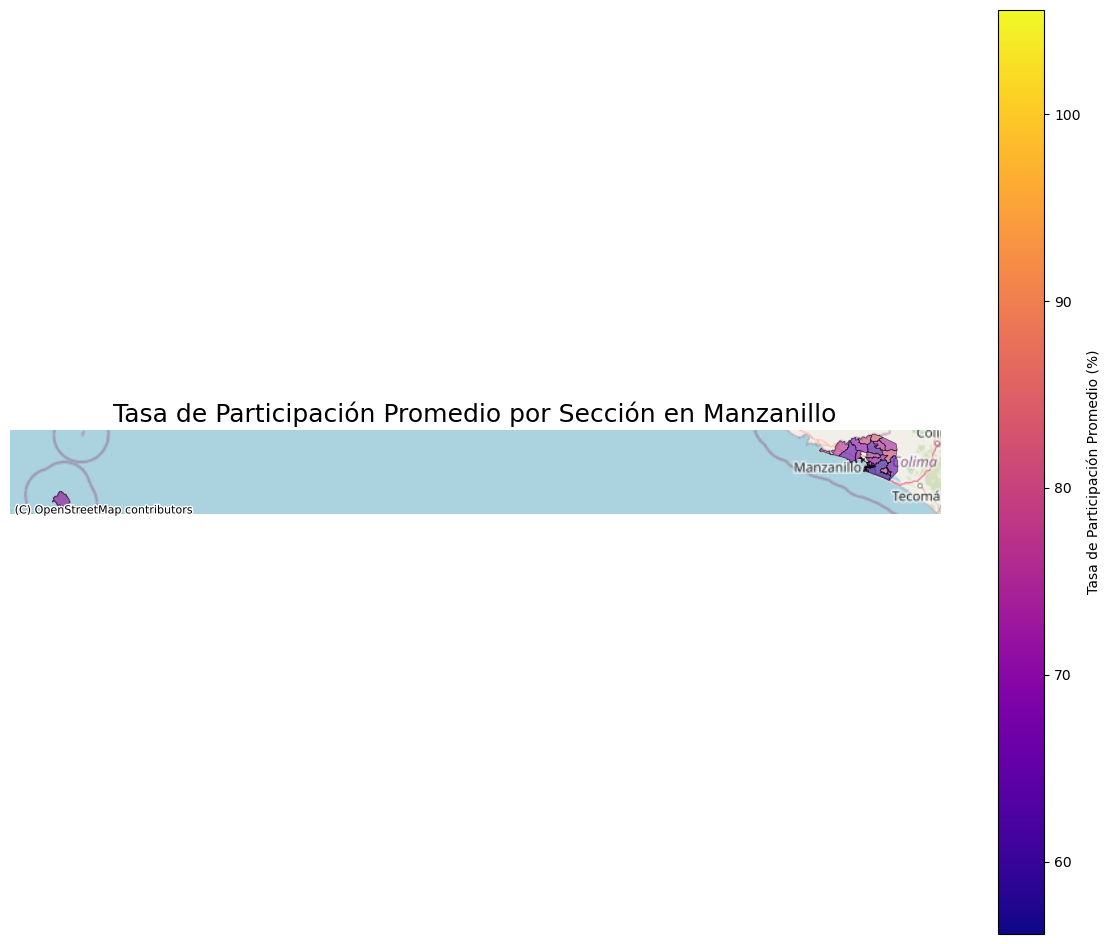

In [56]:
# --- Celda 9: Visualización Estática Mejorada ---
import contextily as cx

print("Generando mapa estático mejorado con mapa base...")

# 1. Reproyectar el CRS (Paso CRÍTICO)
# Los mapas base de internet (como OpenStreetMap) usan una proyección específica (EPSG:3857).
# Necesitamos convertir nuestro GeoDataFrame a ese mismo sistema de coordenadas para que todo encaje.
gdf_web = gdf_maestro.to_crs(epsg=3857)

# 2. Crear la figura y el eje del mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# 3. Dibujar nuestro mapa de datos (el "choropleth")
gdf_web.plot(column='tasa_participacion_promedio', # Columna numérica para colorear
             ax=ax,
             legend=True,
             cmap='plasma',
             alpha=0.6, # Hacemos los polígonos un poco transparentes para ver el mapa de abajo
             edgecolor='black',
             linewidth=0.5,
             legend_kwds={'shrink': 0.8, 'label': 'Tasa de Participación Promedio (%)'})

# 4. Añadir el mapa base usando contextily
# cx.providers tiene muchas opciones (OpenStreetMap, Stamen, Esri, etc.)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# 5. Ajustes finales
ax.set_title('Tasa de Participación Promedio por Sección en Manzanillo', fontsize=18)
ax.set_axis_off() # Ocultamos los ejes (coordenadas X y Y) que no aportan mucho
plt.show()

In [54]:
try:
    # Asegurarnos de que el directorio de salida exista
    os.makedirs(RUTA_DATOS_PROCESADOS, exist_ok=True)
    
    gdf_maestro.to_file(RUTA_SALIDA_GPKG, driver='GPKG')
    print(f"¡Éxito! GeoDataFrame maestro guardado en:")
    print(RUTA_SALIDA_GPKG)
except Exception as e:
    print(f"Ocurrió un error al guardar el archivo: {e}")

¡Éxito! GeoDataFrame maestro guardado en:
../1_datos/02_procesados/gdf_maestro_manzanillo.gpkg
